## MetENP

MetENP is a R package that enables detection of significant metabolites from metabolite information 
(names or names and concentration along with metadata information) and provides

1. Enrichment score of metabolite class,
2. Maps to pathway of the species of choice,
3. Calculate enrichment score of pathways,
4. Plots the pathways and shows the metabolite increase or decrease
5. Gets gene info, reaction info, enzyme info

For more info, check out the vignette.

In [1]:
if (!requireNamespace("KEGGREST", quietly = TRUE))
    BiocManager::install("KEGGREST", update = TRUE, ask = FALSE)

if (!requireNamespace("KEGGgraph", quietly = TRUE))
    BiocManager::install("KEGGgraph", update = TRUE, ask = FALSE)

if (!requireNamespace("pathview", quietly = TRUE))
    BiocManager::install("pathview", update = TRUE, ask = FALSE)

#if (!requireNamespace("KEGG.db", quietly = TRUE))
#    BiocManager::install("KEGG.db", update = TRUE, ask = FALSE)

#if (!requireNamespace("MetENP", quietly = TRUE))
#    devtools::install("..", upgrade = "never")



##############################################################################
Pathview is an open source software package distributed under GNU General
Public License version 3 (GPLv3). Details of GPLv3 is available at
http://www.gnu.org/licenses/gpl-3.0.html. Particullary, users are required to
formally cite the original Pathview paper (not just mention it) in publications
or products. For details, do citation("pathview") within R.

The pathview downloads and uses KEGG data. Non-academic uses may require a KEGG
license agreement (details at http://www.kegg.jp/kegg/legal.html).
##############################################################################



In [2]:
USER_HOME=Sys.getenv("HOME");
.libPaths( c( .libPaths(), paste0(USER_HOME, "/.local/R") ))
#.libPaths( c( .libPaths(), paste0("../../R") )); # suitable path to where MetENP R package is installed

library(MetENP)

#### If you do not wish to install, alternatively, download from github(https://github.com/metabolomicsworkbench/MetENP) and load libraries and functions

In [3]:
data = getmwstudies('ST001951', 'data')
head(data)

analysis_id,analysis_summary,metabolite_name,metabolite_id,refmet_name,Day0-1,Day0-2,Day0-3,Day14-1,Day14-2,Day14-3,Day28-1,Day28-2,Day28-3,Day4-1,Day4-2,Day4-3
<named list>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AN003176,Reversed phase NEGATIVE ION MODE,10-HDoHE,ME450664,10-HDoHE,0.002323813,0.002673189,0.001893541,0.001593392,0.001720838,0.002363037,0.001184357,0.001101074,0.001746215,0.001739818,0.003115421,0.001585152
AN003176,Reversed phase NEGATIVE ION MODE,"11,12-DHET",ME450645,"11,12-DiHETrE",0.000341166,0.000441905,0.000323266,0.000361373,0.000261501,0.00025319,0.000379297,0.000265099,0.000571349,0.000375622,0.000340215,0.000403358
AN003176,Reversed phase NEGATIVE ION MODE,"11,12-EET",ME450641,"11,12-EpETrE",0.002094514,0.002732497,0.002310557,0.002022885,0.001690887,0.001693209,0.00174947,0.001761026,0.00188406,0.001986864,0.002257773,0.002248735
AN003176,Reversed phase NEGATIVE ION MODE,"11,12-EpETE",ME450657,"11,12-EpETrE",0.000324572,0.000390902,0.000329246,0.000411165,0.000440067,0.000262108,0.000394276,0.000418382,0.000248597,0.000267997,0.000234695,0.000222471
AN003176,Reversed phase NEGATIVE ION MODE,11-HDoHE,ME450665,11-HDoHE,0.001482286,0.001977382,0.001507211,0.001143453,0.001570896,0.001177879,0.001314854,0.001479621,0.001902711,0.001506963,0.001521635,0.001640305
AN003176,Reversed phase NEGATIVE ION MODE,11-HEPE,ME450650,11-HEPE,0.001475127,0.001469387,0.001682758,0.001465607,0.001513288,0.001291095,0.001492179,0.001078286,0.001373264,0.001282885,0.001474392,0.00174132


In [4]:
metadata = getmwstudies('ST001951', 'factors')
head(metadata)

,study_id,local_sample_id,subject_type,factors,Time after hypoxia (days)
,<named list>,<named list>,<named list>,<named list>,<chr>
1,ST001951,Day0-1,Mammal,Time after hypoxia (days):-,Time after hypoxia (days):-
2,ST001951,Day0-2,Mammal,Time after hypoxia (days):-,Time after hypoxia (days):-
3,ST001951,Day0-3,Mammal,Time after hypoxia (days):-,Time after hypoxia (days):-
4,ST001951,Day14-1,Mammal,Time after hypoxia (days):14,Time after hypoxia (days):14
5,ST001951,Day14-2,Mammal,Time after hypoxia (days):14,Time after hypoxia (days):14
6,ST001951,Day14-3,Mammal,Time after hypoxia (days):14,Time after hypoxia (days):14


Find the factors you would want to compare
Multiple factors (independent variables) are formatted in multiple columns but you can get information on all the factors by "factors" column, such as 'TreatmentGroup:Prednisolone', this indicates column name 'TreatmentGroup' with factor Prednisolone. For t-test use the factors in the same column. For comparing multipe independent variables use anova by anova_ana function.


### Associate metabolomics data to the refmet class


In [5]:

refmet_class= convert_refmet(data)
head(refmet_class)

,metabolite_name,analysis_id,analysis_summary,metabolite_id,refmet_name,Day0-1,Day0-2,Day0-3,Day14-1,Day14-2,⋯,Day28-1,Day28-2,Day28-3,Day4-1,Day4-2,Day4-3,formula,super_class,main_class,sub_class
,<chr>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,10-HDoHE,AN003176,Reversed phase NEGATIVE ION MODE,ME450664,10-HDoHE,0.002323813,0.002673189,0.001893541,0.001593392,0.001720838,⋯,0.001184357,0.001101074,0.001746215,0.001739818,0.003115421,0.001585152,C22H32O3,Fatty Acyls,Docosanoids,Docosanoids
2,11-HDoHE,AN003176,Reversed phase NEGATIVE ION MODE,ME450665,11-HDoHE,0.001482286,0.001977382,0.001507211,0.001143453,0.001570896,⋯,0.001314854,0.001479621,0.001902711,0.001506963,0.001521635,0.001640305,C22H32O3,Fatty Acyls,Docosanoids,Docosanoids
3,11-HEPE,AN003176,Reversed phase NEGATIVE ION MODE,ME450650,11-HEPE,0.001475127,0.001469387,0.001682758,0.001465607,0.001513288,⋯,0.001492179,0.001078286,0.001373264,0.001282885,0.001474392,0.00174132,C20H30O3,Fatty Acyls,Eicosanoids,HEPE
4,11-HETE,AN003176,Reversed phase NEGATIVE ION MODE,ME450631,11-HETE,0.006135379,0.003856802,0.004139105,0.007474203,0.01429298,⋯,0.006604251,0.005071509,0.014177479,0.00290529,0.003506085,0.017565401,C20H32O3,Fatty Acyls,Eicosanoids,HETE
5,"11,12-DHET",AN003176,Reversed phase NEGATIVE ION MODE,ME450645,"11,12-DiHETrE",0.000341166,0.000441905,0.000323266,0.000361373,0.000261501,⋯,0.000379297,0.000265099,0.000571349,0.000375622,0.000340215,0.000403358,C20H34O4,Fatty Acyls,Eicosanoids,HETrE
6,"11,12-EET",AN003176,Reversed phase NEGATIVE ION MODE,ME450641,"11,12-EpETrE",0.002094514,0.002732497,0.002310557,0.002022885,0.001690887,⋯,0.00174947,0.001761026,0.00188406,0.001986864,0.002257773,0.002248735,C20H32O3,Fatty Acyls,Eicosanoids,EpETrE


In [6]:
unique(metadata$factors)


[[1]]
[1] "Time after hypoxia (days):-"

[[2]]
[1] "Time after hypoxia (days):14"

[[3]]
[1] "Time after hypoxia (days):28"

[[4]]
[1] "Time after hypoxia (days):4"

In [7]:
### Find the analysis mode
unique(data$analysis_summary)

[[1]]
[1] "Reversed phase NEGATIVE ION MODE"

### Find significant metabolites, run significance of all the analysis summary together. The analysis summary/modes you got in the previous section
There is a normalization step which takes into account missing values, and this can be achieved via three methods:

1) half_of_min: where the NAs are replaced by half of min values in the data

2) remove_NAs: where Cols with NAs values are removed

3) 50percent: where cols with more than 50% NAs values are removed

half_of_min is ideal when you wish to see which metabolites were present in either group. Very high fold change would mean it was present in either group. 

In [8]:
stats_metabolites = significant_met(metabolomics_data=refmet_class, met_col="metabolite_name",analysis_type=c("Reversed phase NEGATIVE ION MODE"), metadata=metadata, factor1='Time after hypoxia (days):-', factor2=c('Time after hypoxia (days):14'), factor_col='Time after hypoxia (days)',sample_col='local_sample_id', p_adjust='fdr',normalization="50percent")

sig_metabolites = stats_metabolites[which(stats_metabolites[,"pval"] <= 0.05&abs(stats_metabolites[,"log2Fold_change"])>0.5),]


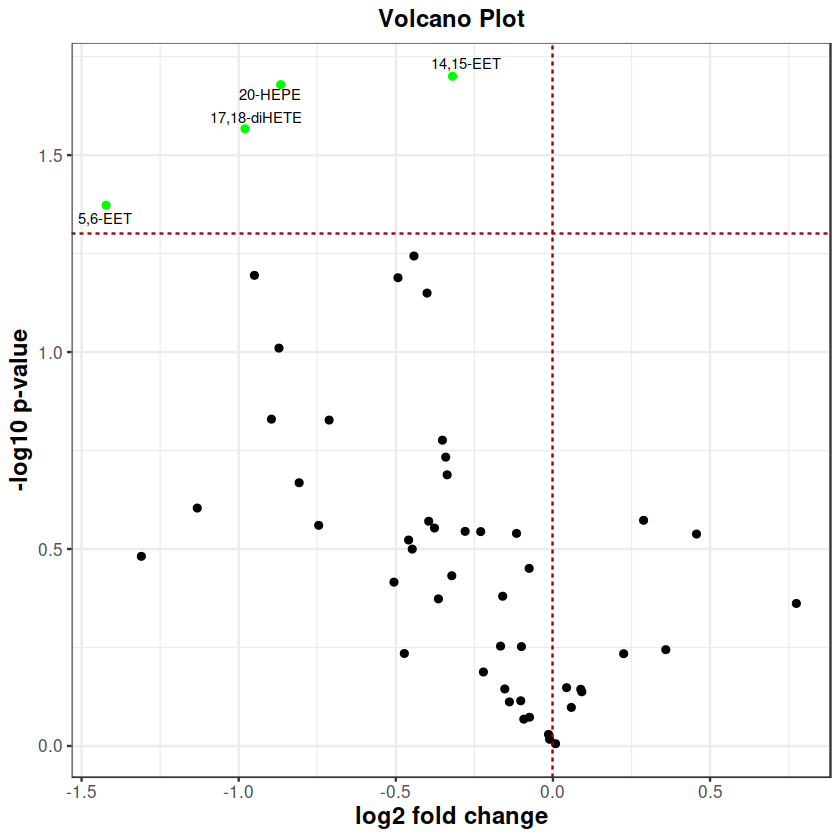

In [9]:
plot_volcano(stats_metabolites, thres_pval= 0.05,thres_log2foldchange = 0.0, TRUE)

### Map metabolite class of the significant metabolites utilzing refmet classification in Metabolomics Workbench
This function not only maps metabolite to metabolite class but also to external databases such as pubchem, inchi key, smiles and kegg

In this example, we will go forward with significant metabolite obtained by t-test/

In [10]:

sig_metabolites_kegg_id= map_keggid(sig_metabolites)

#### Check all your significant metabolites have not been assigned metabolite class

In [11]:
setdiff(sig_metabolites$refmet_name, sig_metabolites_kegg_id$refmet_name)

character(0)

### Count metabolites in each of the metabolite class and plotting
You may choose from sub_class, main_class and super_class

In [12]:
count_changes = metcountplot(df_metclass=sig_metabolites_kegg_id, metclass='sub_class', plotting=TRUE, thres_logfC = 0.0)


Warning message:
“Use of `count_changes[[metclass]]` is discouraged. Use `.data[[metclass]]` instead.”


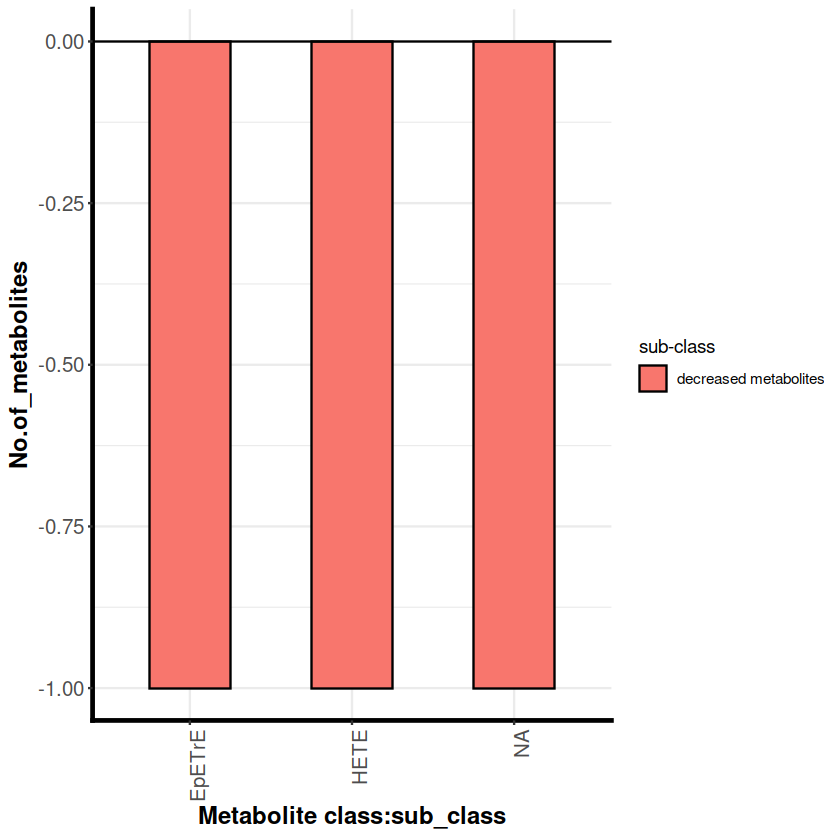

In [13]:
count_changes$plotimg

### Enrichment class score

Calculate the enrichment score of each metabolite class. Enrichment score is calculated through hypergeometric method. One can specify the no. of significant metabolites in a class while calculating the enrichment score. We advice to use the number of mtabolites in each class as 3 or more. But if someone just wants to know the enrichment score and rest of the information of all the metabolites, then they can choose the number as 1.

In [14]:
metenrichment = metclassenrichment(df_metclass=sig_metabolites_kegg_id,refmet_class, metclass="sub_class",enrich_stats="HG",no=1)

#### Plot the enrichment score via function plot_met_enrichment

Warning message:
“Use of `metclass_stats[[metclass]]` is discouraged. Use `.data[[metclass]]` instead.”
Warning message:
“Use of `metclass_stats[[enrich_stats]]` is discouraged. Use `.data[[enrich_stats]]` instead.”
Warning message:
“Use of `metclass_stats[[enrich_stats]]` is discouraged. Use `.data[[enrich_stats]]` instead.”


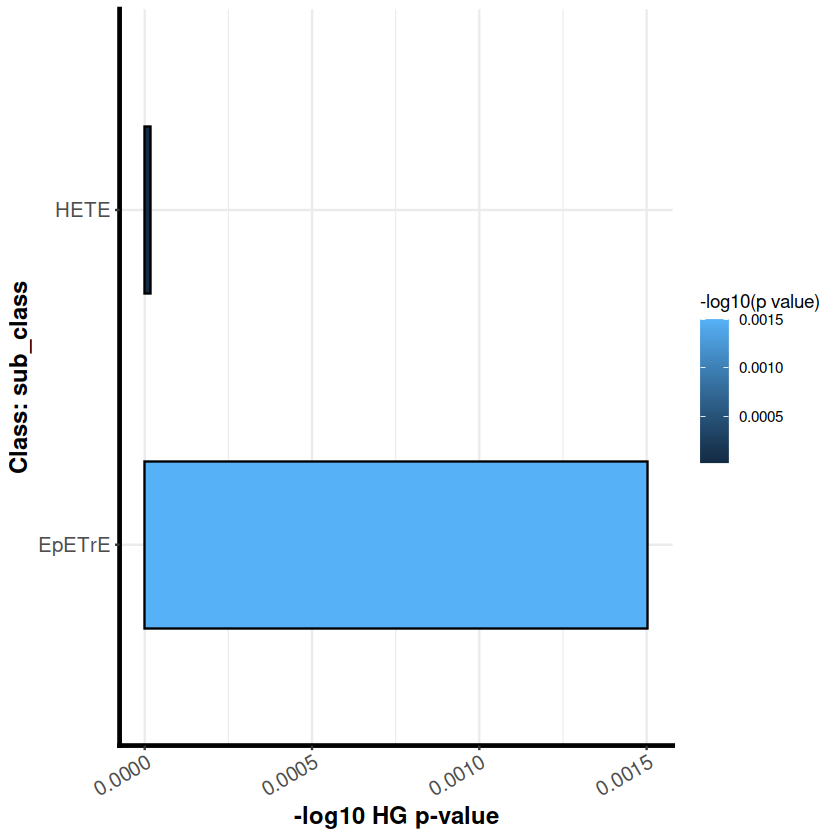

In [15]:
plot_met_enrichment(metenrichment, "sub_class","HG", no=1)

### Check the pathways with reactions of all the significant metabolites

In [16]:
met_path = met_pathways(df_metenrichment = metenrichment, 'hsa')
head(met_path)

[1] "query_split val"
NULL
[1] "----colnames of dd---"
[1] "ENTRY"      NA           "PATHWAY"    "RCLASS"     "ORTHOLOGY" 
[6] "DEFINITION" "EQUATION"   "ENZYME"    
[1] "-----"
[1] "colnames of df"
[1] "ENTRY"      NA           "PATHWAY"    "RCLASS"     "ORTHOLOGY" 
[6] "DEFINITION" "EQUATION"   "ENZYME"    
[1] "======"
[1] "After renaming columns"
[1] "ENTRY"         "NAME"          "PATHWAY"       "RCLASS"       
[5] "ORTHOLOGY"     "EQUATION_more" "EQUATION"      "ENZYME"       


,rxn,refmet_name,Exact mass,KEGG ID,Metabolite,Time after hypoxia (days):-_mean,Time after hypoxia (days):14_mean,Fold_change,log2Fold_change,t_value,⋯,metabolite_id,super_class,main_class,sub_class,formula,HG p-value,Rxn_name,PATHWAY,pathway_id,sps_path_id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<named list>,<chr>,<chr>,<chr>,<chr>,<dbl>,<named list>,<chr>,<chr>,<chr>
1,R07052,"5,6-EpETrE",320.2351,C14768,"5,6-EET",0.012196016,0.004551488,0.3731947,-1.422,3.098202,⋯,ME450639,Fatty Acyls,Eicosanoids,EpETrE,C20H32O3,0.9965459,NULL,Arachidonic acid metabolism,rn00590,hsa00590
2,R07052,"5,6-EpETrE",320.2351,C14768,"5,6-EET",0.012196016,0.004551488,0.3731947,-1.422,3.098202,⋯,ME450639,Fatty Acyls,Eicosanoids,EpETrE,C20H32O3,0.9965459,NULL,Metabolic pathways,rn01100,hsa01100
3,R07111,"5,6-EpETrE",320.2351,C14768,"5,6-EET",0.012196016,0.004551488,0.3731947,-1.422,3.098202,⋯,ME450639,Fatty Acyls,Eicosanoids,EpETrE,C20H32O3,0.9965459,"5,6-EET hydrolase",Arachidonic acid metabolism,rn00590,hsa00590
4,R07111,"5,6-EpETrE",320.2351,C14768,"5,6-EET",0.012196016,0.004551488,0.3731947,-1.422,3.098202,⋯,ME450639,Fatty Acyls,Eicosanoids,EpETrE,C20H32O3,0.9965459,"5,6-EET hydrolase",Metabolic pathways,rn01100,hsa01100


Find metabolites for which no pathways were registered in Kegg and/or no kegg id was found

In [17]:
setdiff(metenrichment$Metabolite,unique(met_path$Metabolite))

[1] "17,18-diHETE"

### Get pathway enrichment sore.

Once we have the pathway information, we can calculate enrichment score of pathways. Again, here i have used hypergeometric score. For hypergeometric score, we need to know the total number of kegg compounds that are linked to kegg pathways. 
N = total no. of cmpds linked to kegg pathway (this is the step which might take long), so I advice to run the script comp_linkedto_pathways() just the first time or after 6 months or so if desired to run the pipeline again. save the result from comp_linkedto_pathways() and load it. Loading from saved file would save time for another analysis with another study. However the package takes care of loading. Save the data in the data folder.

L = No. of cmpds in a pathway
M= no. of altered cmpds in a pathway
K =  total no. of altered cmpds
phyper(M,L, N-L, K)


This function also utilizes korg dataset from pathview package.

In [18]:
load('../data/ls_path.RData')
load('../data/korg.RData')
kegg_es = path_enrichmentscore(met_path,sig_metabolite_kegg_id=sig_metabolite_kegg_id,ls_path=ls_path,refmet_class=refmet_class,sps='hsa',padj='BH', kegg_comp_path=FALSE)

Warning message in phyper(M - 1, L, N - L, k, lower.tail = FALSE):
“NaNs produced”


In [19]:
head(kegg_es)

,Pathway name,No.of mets in study,Total_no._of_comps_in_pathway,pathway_HG p-value,Padjust
,<fct>,<int>,<int>,<dbl>,<dbl>
1,Arachidonic acid metabolism,1,75,NaN,NaN


### Plot pathway network
Only plotting significant pathways (pathway with p-value significance).

The pathway network is such that it shows metabolites that are connected to different pathways and same metabolite in different pathway. Color of nodes of metabolites are according to the fold change of metabolites (low expression in green and high in red) and size of pathway nodes (square nodes) are according to the number of branches (meaning no of metabolites). All metabolite are written in blue

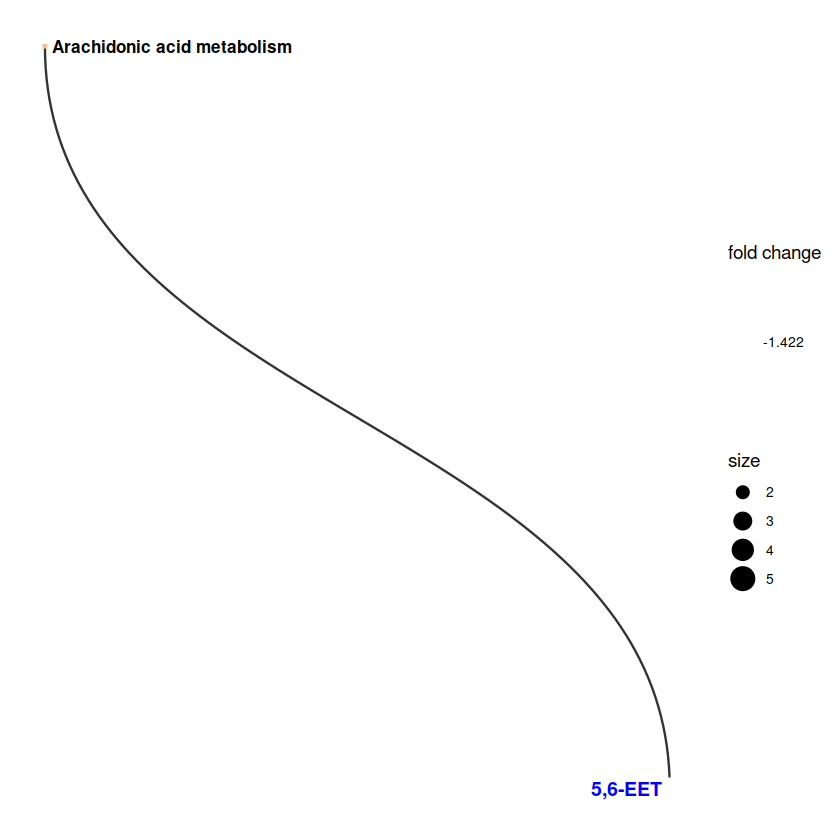

In [20]:
plot_pathway_networks (met_path,kegg_es, TRUE)

### Heatmap

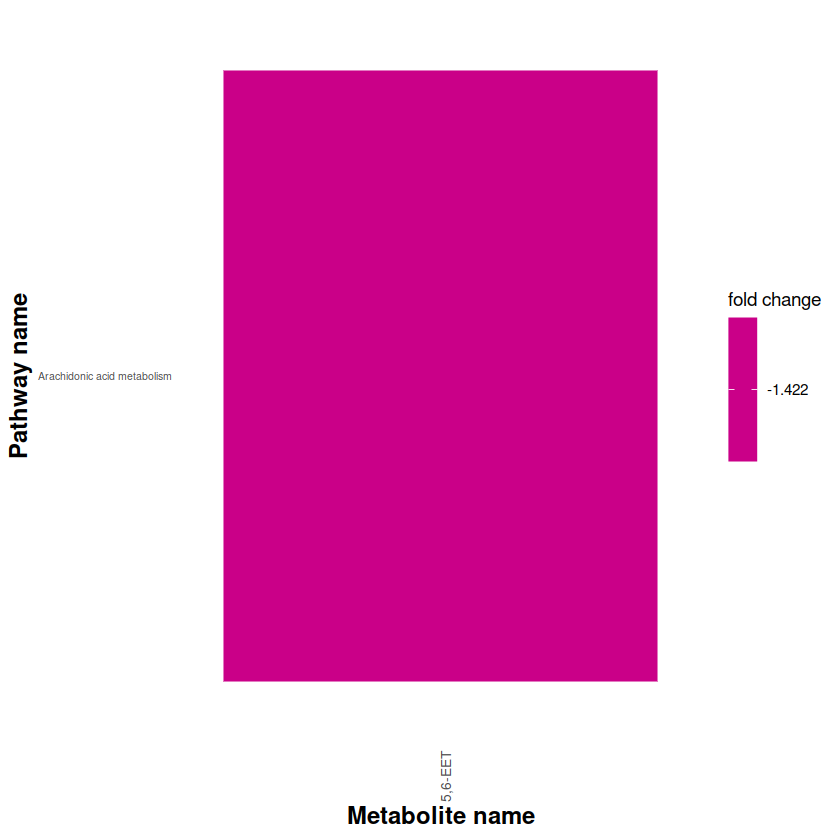

In [21]:
plot_heatmap(met_path, shorten_name=TRUE,refmet_name=FALSE, xaxis=8, yaxis=6)

### Dotplot

Warning message:
“Use of `significant_pathways[["pathway_HG p-value"]]` is discouraged. Use `.data[["pathway_HG p-value"]]` instead.”


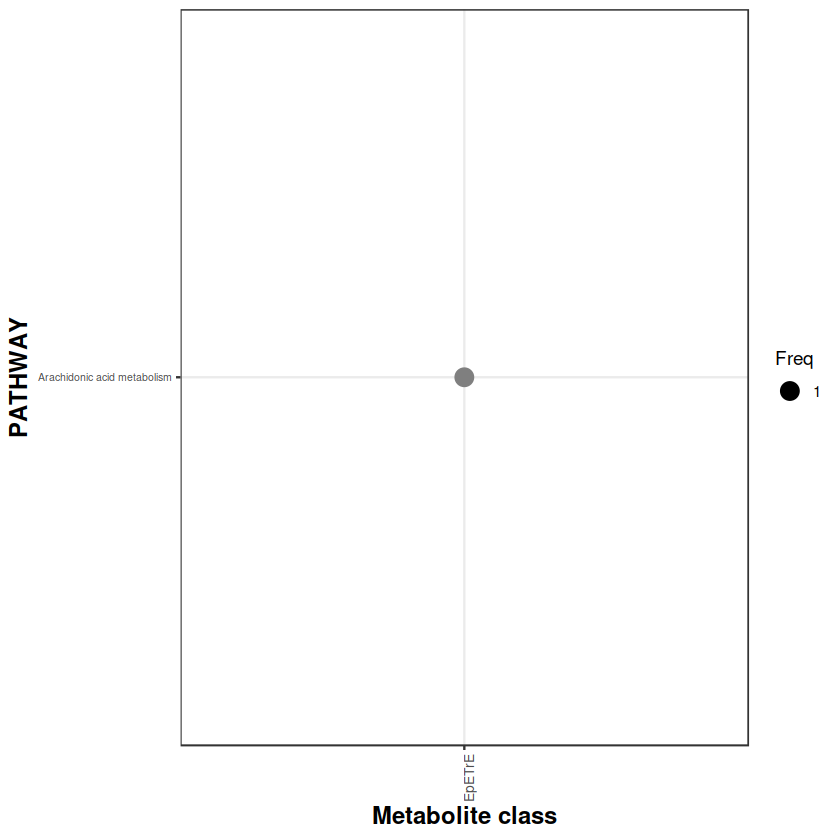

In [22]:

dotplot_met_class_path (met_path, kegg_es,"sub_class",xaxis=8,yaxis=6)

### Get the gene and enzyme info

Here we get the information of genes involved in enriched pathways for specified organism

In [23]:
met_gene_info = enzyme_gene_info (metenrichment, "hsa","sub_class")
head(met_gene_info)

[1] "query_split val"
NULL
[1] "----colnames of dd---"
[1] "ENTRY"      NA           "PATHWAY"    "RCLASS"     "ORTHOLOGY" 
[6] "DEFINITION" "EQUATION"   "ENZYME"    
[1] "-----"
[1] "colnames of df"
[1] "ENTRY"      NA           "PATHWAY"    "RCLASS"     "ORTHOLOGY" 
[6] "DEFINITION" "EQUATION"   "ENZYME"    
[1] "======"
[1] "After renaming columns"
[1] "ENTRY"         "NAME"          "PATHWAY"       "RCLASS"       
[5] "ORTHOLOGY"     "EQUATION_more" "EQUATION"      "ENZYME"       


,orthology_id,ORTHOLOGY,gene_id,gene_name,ORGANISM,PATHWAY,DBLINKS,MOTIF,rxn,Metabolite,KEGG ID,sub_class,Rxn_name,RCLASS,EQUATION,EQUATION_more,ENZYME
,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>
1,K07418,cytochrome P450 family 2 subfamily J [EC:1.14.14.1 1.14.14.73 1.14.14.74 1.14.14.75],1573,(RefSeq) cytochrome P450 family 2 subfamily J member 2,Homo sapiens (human),"Arachidonic acid metabolism , Linoleic acid metabolism , Metabolic pathways , Serotonergic synapse , Inflammatory mediator regulation of TRP channels, Ovarian steroidogenesis , Lipid and atherosclerosis","NCBI-GeneID: 1573 , NCBI-ProteinID: NP_000766, OMIM: 601258 , HGNC: 2634 , Ensembl: ENSG00000134716 , Vega: OTTHUMG00000008991 , Pharos: P51589(Tchem) , UniProt: P51589",Pfam: p450,R07052,"5,6-EET",C14768,EpETrE,NULL,"RC00001 C00005_C00006, RC01711 C00219_C14768",C00219 + C00007 + C00005 + C00080 <=> C14768 + C00006 + C00001,"Arachidonate + Oxygen + NADPH + H+ <=> 5,6-EET + NADP+ + H2O","1.14.14.1, 1.14.14.-"
2,K08726,soluble epoxide hydrolase / lipid-phosphate phosphatase [EC:3.3.2.10 3.1.3.76],2053,(RefSeq) epoxide hydrolase 2,Homo sapiens (human),"Arachidonic acid metabolism , Metabolic pathways , Peroxisome , Chemical carcinogenesis - receptor activation , Chemical carcinogenesis - reactive oxygen species","NCBI-GeneID: 2053 , NCBI-ProteinID: NP_001970, OMIM: 132811 , HGNC: 3402 , Ensembl: ENSG00000120915 , Vega: OTTHUMG00000102115 , Pharos: P34913(Tchem) , UniProt: P34913",Pfam: Abhydrolase_1 Abhydrolase_6 Hydrolase_4 HAD_2 Hydrolase Hydrolase_like Resolvase E2_bind Ndr Abhydrolase_2,R07111,"5,6-EET",C14768,EpETrE,"5,6-EET hydrolase",RC01757 C14768_C14772,C14768 + C00001 <=> C14772,"5,6-EET + H2O <=> 5,6-DHET",3.3.2.10
3,K17709,cytochrome P450 family 2 subfamily B6 [EC:1.14.14.-],1555,(RefSeq) cytochrome P450 family 2 subfamily B member 6,Homo sapiens (human),"Arachidonic acid metabolism , Retinol metabolism , Metabolism of xenobiotics by cytochrome P450 , Drug metabolism - cytochrome P450 , Metabolic pathways , Chemical carcinogenesis - receptor activation, Lipid and atherosclerosis","NCBI-GeneID: 1555 , NCBI-ProteinID: NP_000758, OMIM: 123930 , HGNC: 2615 , Ensembl: ENSG00000197408 , Vega: OTTHUMG00000182714 , Pharos: P20813(Tbio) , UniProt: P20813",Pfam: p450 DUF6145,R07052,"5,6-EET",C14768,EpETrE,NULL,"RC00001 C00005_C00006, RC01711 C00219_C14768",C00219 + C00007 + C00005 + C00080 <=> C14768 + C00006 + C00001,"Arachidonate + Oxygen + NADPH + H+ <=> 5,6-EET + NADP+ + H2O","1.14.14.1, 1.14.14.-"


#### Get the information if metabolite is a reactant or substrate

In [24]:
rclass_info = react_substrate(met_gene_info)
head(rclass_info)

,orthology_id,ORTHOLOGY,gene_id,gene_name,ORGANISM,PATHWAY,DBLINKS,MOTIF,rxn,Metabolite,KEGG ID,sub_class,Rxn_name,RCLASS,EQUATION,EQUATION_more,ENZYME,reactant_product
,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<chr>
1,K07418,cytochrome P450 family 2 subfamily J [EC:1.14.14.1 1.14.14.73 1.14.14.74 1.14.14.75],1573,(RefSeq) cytochrome P450 family 2 subfamily J member 2,Homo sapiens (human),"Arachidonic acid metabolism , Linoleic acid metabolism , Metabolic pathways , Serotonergic synapse , Inflammatory mediator regulation of TRP channels, Ovarian steroidogenesis , Lipid and atherosclerosis","NCBI-GeneID: 1573 , NCBI-ProteinID: NP_000766, OMIM: 601258 , HGNC: 2634 , Ensembl: ENSG00000134716 , Vega: OTTHUMG00000008991 , Pharos: P51589(Tchem) , UniProt: P51589",Pfam: p450,R07052,"5,6-EET",C14768,EpETrE,NULL,"RC00001 C00005_C00006, RC01711 C00219_C14768",C00219 + C00007 + C00005 + C00080 <=> C14768 + C00006 + C00001,"Arachidonate + Oxygen + NADPH + H+ <=> 5,6-EET + NADP+ + H2O","1.14.14.1, 1.14.14.-",Product
2,K08726,soluble epoxide hydrolase / lipid-phosphate phosphatase [EC:3.3.2.10 3.1.3.76],2053,(RefSeq) epoxide hydrolase 2,Homo sapiens (human),"Arachidonic acid metabolism , Metabolic pathways , Peroxisome , Chemical carcinogenesis - receptor activation , Chemical carcinogenesis - reactive oxygen species","NCBI-GeneID: 2053 , NCBI-ProteinID: NP_001970, OMIM: 132811 , HGNC: 3402 , Ensembl: ENSG00000120915 , Vega: OTTHUMG00000102115 , Pharos: P34913(Tchem) , UniProt: P34913",Pfam: Abhydrolase_1 Abhydrolase_6 Hydrolase_4 HAD_2 Hydrolase Hydrolase_like Resolvase E2_bind Ndr Abhydrolase_2,R07111,"5,6-EET",C14768,EpETrE,"5,6-EET hydrolase",RC01757 C14768_C14772,C14768 + C00001 <=> C14772,"5,6-EET + H2O <=> 5,6-DHET",3.3.2.10,Substrate
3,K17709,cytochrome P450 family 2 subfamily B6 [EC:1.14.14.-],1555,(RefSeq) cytochrome P450 family 2 subfamily B member 6,Homo sapiens (human),"Arachidonic acid metabolism , Retinol metabolism , Metabolism of xenobiotics by cytochrome P450 , Drug metabolism - cytochrome P450 , Metabolic pathways , Chemical carcinogenesis - receptor activation, Lipid and atherosclerosis","NCBI-GeneID: 1555 , NCBI-ProteinID: NP_000758, OMIM: 123930 , HGNC: 2615 , Ensembl: ENSG00000197408 , Vega: OTTHUMG00000182714 , Pharos: P20813(Tbio) , UniProt: P20813",Pfam: p450 DUF6145,R07052,"5,6-EET",C14768,EpETrE,NULL,"RC00001 C00005_C00006, RC01711 C00219_C14768",C00219 + C00007 + C00005 + C00080 <=> C14768 + C00006 + C00001,"Arachidonate + Oxygen + NADPH + H+ <=> 5,6-EET + NADP+ + H2O","1.14.14.1, 1.14.14.-",Product


#### Get gene info in short form

In [25]:
met_gene_info2=data.table::data.table(rclass_info)[,lapply(.SD, function(x) toString(unique(x))), by = 'Metabolite']